# OK Cupid Dataset

This dataset consist of a majority of catagorical veriables, there fore my approach to this will be: 

    1) preliminary data exploration
    2) data cleaning 
    3) filling in missing values
    4) encoding catagorical values
    5) unbiasing the data

In [1]:
# Import libraries 

# Import data science libraries 
import pandas as pd
import re # regulate expression library 
import numpy as np

# Import data visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns

# import csv library
import csv

# Import data splitting librar
from sklearn.model_selection import train_test_split

#Import machine learning algorithm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#Import metrics
from sklearn.metrics import accuracy_score

%matplotlib inline

In [8]:
# Load dataset direct from PC, importing form website would require a direct URL from the UCL website
okcupid_cluster = pd.read_csv('Desktop/Data Science Career Change/WIP Projects/WIP OK Cupid/OKCupid-Date-A-Scientist-Starter/OKCupid-Date-A-Scientist-Starter/profiles_cluster.csv',encoding='utf-8')


# Preliminary Data Exploration 

In [9]:
okcupid_cluster.head()

,essay0
0,about me:<br />\n<br />\ni would love to think...
1,i am a chef: this is what that means.<br />\n1...
2,"i'm not ashamed of much, but writing public te..."
3,i work in a library and go to school. . .
4,hey how's it going? currently vague on the pro...


In [10]:
okcupid_cluster['essay0'].value_counts(0)

.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [11]:
okcupid_cluster.shape

(54464, 1)

In [12]:
okcupid_cluster.describe()

,essay0
count,54461
unique,54352
top,.
freq,12


In [13]:
print(okcupid_cluster.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54464 entries, 0 to 54463
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   essay0  54461 non-null  object
dtypes: object(1)
memory usage: 425.6+ KB
None


In [14]:
# Examine rows with Missing Values 
okcupid_cluster[okcupid_cluster.isnull().any(axis=1)] # filter any rows to include any row whose value is null

,essay0
17899,NaN
24227,NaN
37409,NaN


In [19]:
print(okcupid_cluster['essay0'].value_counts().unique())# print all unique values in a particular column


[12 11  7  6  5  4  3  2  1]


Conclusion 

# Data Cleaning, Wrangling and Tidying 

Preliminary data cleaning

In [20]:
# From priliminary observation I cannot detect any duplicate rows 
# the .drop_duplicates() function removes duplicate rows
okcupid_cluster = okcupid_cluster.drop_duplicates() 

# Total number of rows
total_rows = len(okcupid_cluster)

# Number of unique rows
unique_rows = len(okcupid_cluster.drop_duplicates())

# Number of duplicate rows
duplicate_rows = total_rows - unique_rows

# Print the number of duplicates
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [22]:
# it looks like all of the data is in lowercase, however I will scan the data to make sure.
okcupid_cluster.columns = map(str.lower, okcupid_cluster.columns)

In [22]:
# axis=1` refers to the columns, `axis=0` would refer to the rows
# In the dictionary the key refers to the original column name and the value refers to the new column name {'oldname1': 'newname1', 'oldname2': 'newname2'}
okcupid_cluster = okcupid_cluster.rename({'essay0': 'about_me'}, axis=1)


# the .head(10) function will show us the first 10 rows in our dataset
okcupid_cluster.head(10)

,about_me
0,about me:<br />\n<br />\ni would love to think...
1,i am a chef: this is what that means.<br />\n1...
2,"i'm not ashamed of much, but writing public te..."
3,i work in a library and go to school. . .
4,hey how's it going? currently vague on the pro...
5,"i'm an australian living in san francisco, but..."
6,life is about the little things. i love to lau...
7,my names jake.<br />\ni'm a creative guy and i...
8,"update: i'm seeing someone, so off the market ..."
9,"i was born in wisconsin, grew up in iowa, and ..."


In [23]:
okcupid_cluster.columns

Index(['about_me'], dtype='object')

In [24]:
# Observing the datasets data types
okcupid_cluster.dtypes
# There are three types of variable, interger, object and floats but no bolean variables

about_me    object
dtype: object

We see that our data consists of lots of different appearance which cannot be correct and may require some generalisation, as well as in other catagores. From initial inspection of the dataset there where some missing or NaN data but this does not appear. Therefore it may be usful to explore if there are correlation between the person type, habbits and body type or locaton etc...



In [25]:
# Find the number of unique values in the dataframe

unique_counts = okcupid_cluster.nunique()

print(unique_counts)

about_me    54352
dtype: int64


In [26]:
# String Parsing

# We need to reduce the amount of unique values with the free-text columns to...
    #1) remove unnecessary information reges
    #2) tokenisation
    

okcupid_cluster.about_me = okcupid_cluster['about_me'].replace (r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)

unique_counts = okcupid.nunique()
print(unique_counts)

essay0    54352
dtype: int64


# Remove missing values

In [27]:
# Removing Duplicates

duplicates = okcupid_cluster.duplicated()
print(duplicates.head())
print(duplicates.value_counts())

okcupid_cluster = okcupid_cluster.drop_duplicates()
duplicates = okcupid_cluster.duplicated()
print(duplicates.head())
print(duplicates.value_counts())

# Therefore we can observe that there are no duplicates

0    False
1    False
2    False
3    False
4    False
dtype: bool
False    54345
True         8
dtype: int64
0    False
1    False
2    False
3    False
4    False
dtype: bool
False    54345
dtype: int64


In [29]:
# To replace NaN values in all columns of a DataFrame, you can use the .fillna() method. Here’s how to do it for all 31 columns:

# Replace NaN values in all columns with a specific value, e.g., 0
#df = df.fillna(0)

# To replace NaN values in a specific column called job, use the .fillna() method on that column. Here’s how:


okcupid_cluster['about_me'] = okcupid_cluster['about_me'].fillna('undisclosed')


# Save the modified DataFrame back to a CSV file if needed
#df.to_csv('modified_file.csv', index=False)


In [30]:
# counts the number of missing values in each column 
okcupid_cluster.isna().sum() 

# We see that there are missing values in most colums and from an initial inspection these are empty boxes


about_me    0
dtype: int64

## Transforming the data 

### (see Encoding Categorical Variables article >> under Data Transformations for Feature Analysis>> machine learning fundamentals)

In [32]:
okcupid_cluster['about_me'].value_counts()
#okcupid_reset.drinks_rating.value_counts(normalize=True)

 me\n\n    think    some some kind  intellectual\neither  dumbest smart guy, or  smartest dumb guy. cant say \ncan tell  difference.    talk  ideas  concepts. \nforge odd metaphors instead  reciting cliches. like \nsimularities between  friend  mine house   underwater\nsalt mine.  favorite word is salt by  way (weird choice \nknow).  me most things  life  better  metaphors.  seek \nmake myself  little better everyday,  some productively lazy\nway. got tired  tying  shoes. considered hiring  five year\nold, but  probably   tie both  our shoes... decided \nonly wear leather shoes dress shoes.\n\n \n\n     serious,  deep conversations \n silly stuff.     willing  snap me out  \nlight hearted rant with  kiss.  dont    funny, but \n   able  make me laugh.  should  able  bend spoons\nwith your mind,  telepathically make me smile while  am still\nat work.  should  life,   cool with just letting \nwind blow. extra points  reading all this  guessing \nfavorite video game (no hints given yet).  

In [34]:
# using nominal encoding 

# convert feature to category type
okcupid_cluster['about_me'] = okcupid_cluster['about_me'].astype('category')

# save new version of category codes
okcupid_cluster['about_me'] = okcupid_cluster['about_me'].cat.codes

okcupid.dtypes

essay0    object
dtype: object

In [35]:
okcupid_cluster.head()

,about_me
0,24240
1,9782
2,26168
3,30588
4,39004


In [36]:
print(okcupid_cluster.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54345 entries, 0 to 54463
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   about_me  54345 non-null  int32
dtypes: int32(1)
memory usage: 636.9 KB
None


# KMeans Clustering 

# Clustering the free-text using kmeans

Now that the free text columns have been encoded it may be usful find common patterns through clustering to which will 
help in reducing dimentionality later on. 

Pre-Kmean Visualisation 

In [37]:
import pandas as pd
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score

# Select the column for k-means clustering
about_me_column_data = okcupid_cluster[['about_me']]

# Apply k-means clustering

kmeans = KMeans(n_clusters=10, random_state=2, n_init=10)

okcupid_cluster['about_me_cluster_labels'] = kmeans.fit_predict(about_me_column_data)

print( okcupid_cluster[['about_me']].head(10)) 

feature = okcupid_cluster['about_me_cluster_labels']



   about_me
0     24240
1      9782
2     26168
3     30588
4     39004
5      1601
6     44352
7     25717
8     52066
9      2568


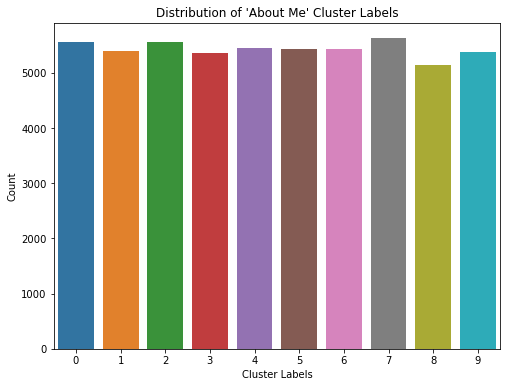

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each cluster label
cluster_counts = okcupid_cluster['about_me_cluster_labels'].value_counts()

# Create a bar plot to show cluster distribution
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="tab10")
plt.xlabel("Cluster Labels")
plt.ylabel("Count")
plt.title("Distribution of 'About Me' Cluster Labels")
plt.show()


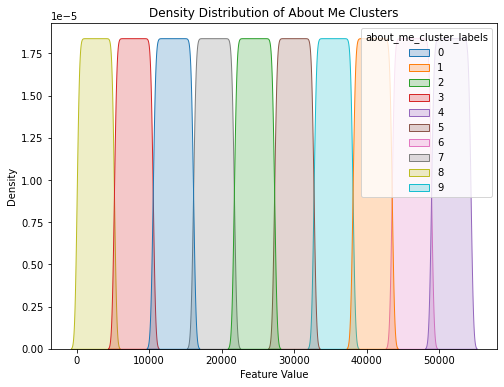

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `about_me_column_data` is a numerical column in `okcupid_cluster`
plt.figure(figsize=(8,6))

# Ensure that `about_me_column_data` is correctly extracted and used
about_me_column_data = okcupid_cluster['about_me'].values.flatten()

sns.kdeplot(x=about_me_column_data, hue=okcupid_cluster['about_me_cluster_labels'], fill=True, palette="tab10")

plt.title("Density Distribution of About Me Clusters")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.show()


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select a single feature and reshape
feature = okcupid_cluster[['employment']].values.reshape(-1, 1)

# Feature Scaling
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature)

# Determine optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(feature_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-means clustering with optimal k (replace with your chosen k)
optimal_k = 4  # Assume 4 based on the elbow plot, adjust accordingly
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(feature_scaled)

# Scatterplot of feature values with color-coded clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature_scaled.flatten(), y=np.zeros_like(feature_scaled.flatten()), hue=clusters, palette="Set2", s=80)

# Plot cluster centres
centres = kmeans.cluster_centers_
plt.scatter(centres, np.zeros_like(centres), c='red', marker='X', s=200, label='Cluster Centres')

plt.xlabel("Standardized Feature Value")
plt.ylabel("Dummy Axis")
plt.title("K-means Clusters with Cluster Centres")
plt.legend()
plt.show()


KeyError: "None of [Index(['employment'], dtype='object')] are in the [columns]"

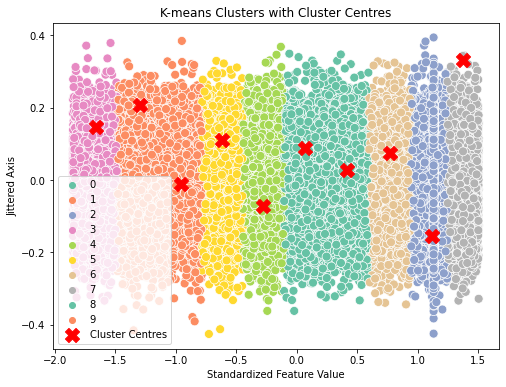

In [90]:
# Apply K-means clustering
optimal_k = 10  # Adjust based on elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(feature_scaled)

# Scatterplot with jitter for better visualization
plt.figure(figsize=(8, 6))
y_jitter = np.random.normal(0, 0.1, size=feature_scaled.shape)  # Add slight noise to y-axis

sns.scatterplot(x=feature_scaled.flatten(), y=y_jitter.flatten(), hue=clusters, palette="Set2", s=80)

# Plot cluster centres with jittered y-values
centres = kmeans.cluster_centers_
plt.scatter(centres, np.random.normal(0, 0.1, size=centres.shape), c='red', marker='X', s=200, label='Cluster Centres')

plt.xlabel("Standardized Feature Value")
plt.ylabel("Jittered Axis")
plt.title("K-means Clusters with Cluster Centres")
plt.legend()
plt.show()


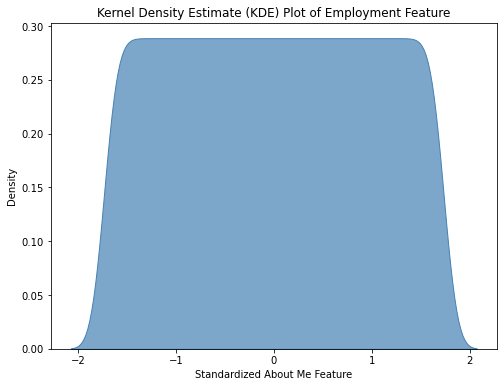

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(okcupid_cluster[['about_me']].values.reshape(-1, 1))

# Plot KDE (kernal density estimate)
plt.figure(figsize=(8, 6))
sns.kdeplot(feature_scaled.flatten(), fill=True, color='steelblue', alpha=0.7)

plt.xlabel("Standardized About Me Feature")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) Plot of Employment Feature")
plt.show()


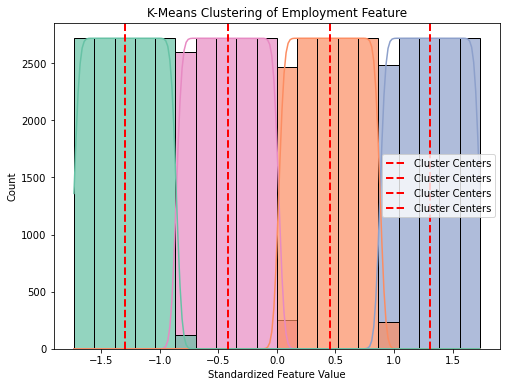

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select and scale feature
feature = okcupid_cluster[['about_me']].values.reshape(-1, 1)
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature)

# Apply K-Means Clustering (adjust number of clusters as needed)
optimal_k = 4  # Choose based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(feature_scaled)

# Create DataFrame for visualization
df = pd.DataFrame({'Feature': feature_scaled.flatten(), 'Cluster': clusters})

# Plot histogram with cluster colors
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Feature", hue="Cluster", bins=20, kde=True, palette="Set2", alpha=0.7)

# Show cluster centers
for center in kmeans.cluster_centers_:
    plt.axvline(center[0], color='red', linestyle='--', linewidth=2, label="Cluster Centers")

plt.xlabel("Standardized Feature Value")
plt.ylabel("Count")
plt.title("K-Means Clustering of Employment Feature")
plt.legend()
plt.show()


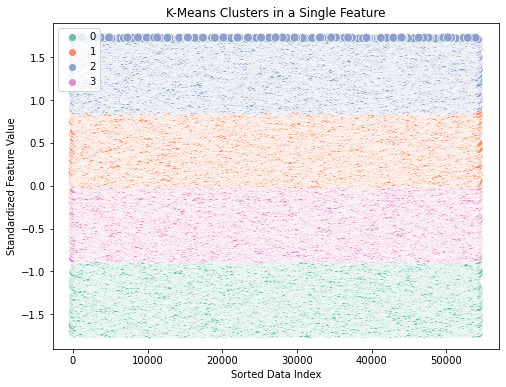

In [50]:
# Sort data by cluster
df_sorted = df.sort_values(by="Feature")

# Line plot to observe separation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_sorted.index, y=df_sorted["Feature"], hue=df_sorted["Cluster"], palette="Set2", s=80)

plt.xlabel("Sorted Data Index")
plt.ylabel("Standardized Feature Value")
plt.title("K-Means Clusters in a Single Feature")
plt.legend()
plt.show()


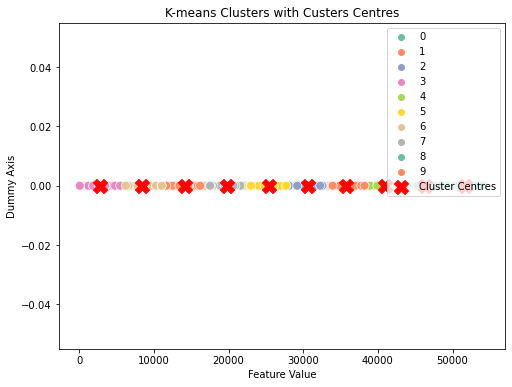

In [51]:
# select a single feature 
feature = okcupid_cluster['about_me'].values.reshape(-1, 1)

# Apply K-means clustering 
kmeans = KMeans(n_clusters=10, random_state =42, n_init=10)
clusters = kmeans.fit_predict(feature)

# Scatterplot of feature values
plt.figure(figsize = (8, 6))
sns.scatterplot(x=feature.flatten(), y = np.zeros_like(feature.flatten()), hue = clusters, palette = "Set2", s=80)

# Plot cluster centres
centres = kmeans.cluster_centers_
plt.scatter(centres, np.zeros_like(centres), c='red', marker = 'X', s = 200, label = 'Cluster Centres')

plt.xlabel("Feature Value")
plt.ylabel("Dummy Axis")
plt.title("K-means Clusters with Custers Centres")
plt.legend()
plt.show()

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume the K-Means model is trained on TF-IDF vectors of 'about_me' data
new_text = ["I love hiking and outdoor adventures."] # Example new input

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# **FIT the vectorizer on the training data**
X = vectorizer.fit_transform(new_text)

# Now, transform new text properly
new_text = ["I enjoy playing guitar and listening to jazz."]
new_text_vectorized = vectorizer.transform(new_text)  # No error this time!

print(new_text_vectorized)

  (0, 1)	1.0


In [112]:
# Extracting the relevant feature
features = okcupid_cluster[['about_me_cluster_labels']]

In [121]:
from sklearn.cluster import KMeans

# Initialize KMeans
model = KMeans(n_clusters=6, random_state=42)

# Fit the model
model.fit(features)

# Predict cluster labels
labels = model.predict(features)

# Print cluster labels
print("Cluster Labels:", labels)

# Convert labels to a DataFrame for visualization
features["Cluster"] = labels

Cluster Labels: [2 5 1 0 3 0 4 3 1 1]


C:\Users\mndpg\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mndpg\AppData\Local\Temp\ipykernel_5164\1923543896.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Cluster"] = labels


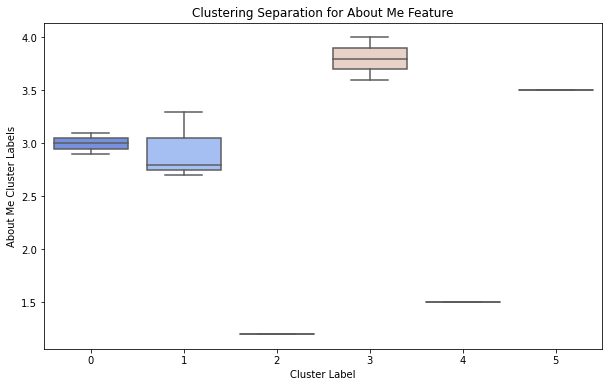

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans


# Create a boxplot to show feature distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x=features["Cluster"], y=features["about_me_cluster_labels"], palette="coolwarm")
plt.xlabel("Cluster Label")
plt.ylabel("About Me Cluster Labels")
plt.title("Clustering Separation for About Me Feature")
plt.show()


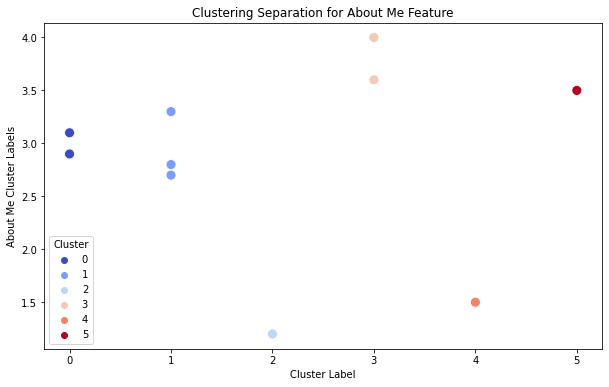

In [123]:
# Create a scatterplot to show feature distribution across clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features["Cluster"], y=features["about_me_cluster_labels"], hue=features["Cluster"], palette="coolwarm", s=100)
plt.xlabel("Cluster Label")
plt.ylabel("About Me Cluster Labels")
plt.title("Clustering Separation for About Me Feature")
plt.show()

C:\Users\mndpg\AppData\Local\Temp\ipykernel_5164\1157830391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Cluster'] = labels  # Add cluster labels to features


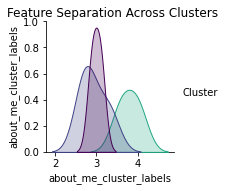

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert labels to DataFrame for easy plotting
features['Cluster'] = labels  # Add cluster labels to features

# Pairplot to visualize how features separate
sns.pairplot(features, hue="Cluster", palette="viridis")
plt.suptitle("Feature Separation Across Clusters", y=1.02)
plt.show()


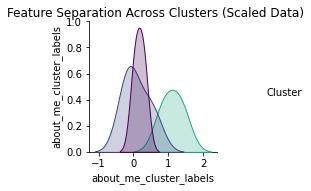

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop(columns=["Cluster"]))  # Exclude cluster labels

# Convert scaled features back into DataFrame for plotting
scaled_df = pd.DataFrame(scaled_features, columns=features.columns[:-1])  # Maintain column names
scaled_df["Cluster"] = labels  # Add cluster labels

# Pairplot to visualize separation in scaled data
sns.pairplot(scaled_df, hue="Cluster", palette="viridis")
plt.suptitle("Feature Separation Across Clusters (Scaled Data)", y=1.02)
plt.show()


In [129]:
fig = plt.figure(figsize=(8, 3))

fig.suptitle('Cluser Center', fontsize=14, fontweight='bold')


Text(0.5, 0.98, 'Cluser Center')

<Figure size 576x216 with 0 Axes>

In [130]:
# Scikit-learn sometimes calls centroids “cluster centers”.
# For loop to display each of the cluster_centers:

for i in range(10):
    # Initialize subplots in a grid of 2x5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)

    # Display images
    ax.imshow(kmeans.cluster_centers_[i].reshape((1, 1)), cmap=plt.cm.binary)



In [131]:
cluster_centers = kmeans.cluster_centers_

print(f"{cluster_centers.shape}\n")
print(cluster_centers)


(10, 1)

[[46267.5]
 [14104.5]
 [30616.5]
 [ 2760.5]
 [40955.5]
 [25355.5]
 [ 8364.5]
 [19835. ]
 [51647. ]
 [35758. ]]


### Visualize After K-Means

#  Principle Component Analysis 

In [148]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Prepare your data: Ensure your data is in a numerical format and standardized (mean = 0, variance = 1) if necessary.

scaler = StandardScaler()
okcupid_scaled = scaler.fit_transform(okcupid_cluster)

pca = PCA(n_components=1) # Initialize PCA: Specify the number of components you want to keep.

principal_components = pca.fit_transform(okcupid_scaled) # Fit and transform the data:


pca_df = pd.DataFrame(data=principal_components, columns=['PC1'])  # Analyze the results: Check the 
                                                                                        #explained variance ratio to 
                                                                                        # understand how much variance each
                                                                                        #component captures.

print(pca.explained_variance_ratio_)
pca_df.head()


[0.68206436]


,PC1
0,-1.880413
1,1.804940
2,-0.786150
3,-0.058697
4,2.061467


In [149]:

# Plot the cluster centers
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='red', marker='.', s=20, label='Cluster Centers')

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
plt.legend()

# Show the plot
plt.title('Cluster Centers in Reduced Dimensionality Space')
plt.show()


IndexError: index 1 is out of bounds for axis 1 with size 1

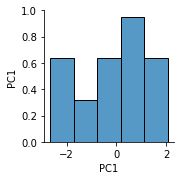

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# If you have a DataFrame with your principal components:
sns.pairplot(pca_df)
plt.show()


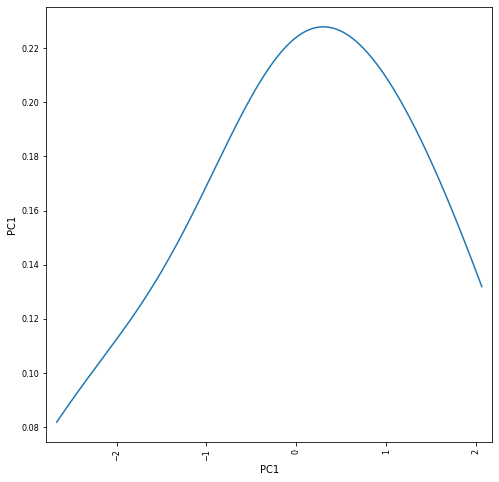

In [151]:
pd.plotting.scatter_matrix(pca_df, figsize=(8, 8), diagonal='kde')
plt.show()


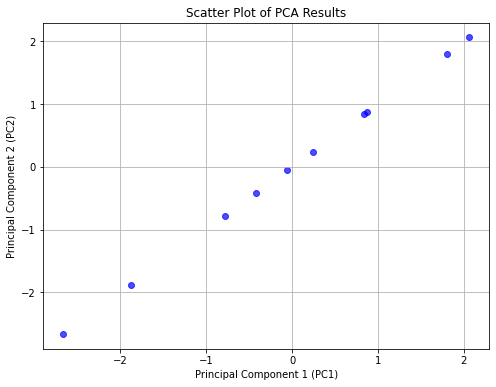

In [160]:
# unscaled data 

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC1'], alpha=0.7, c='blue')  # Adjust 'alpha' and 'c' to customize the plot
plt.title('Scatter Plot of PCA Results')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()


Adding labels to clusters

To label clusters generated from an unsupervised learning algorithm like k-means, follow these steps:

Examine Cluster Centers:

Use the cluster_centers_ attribute of the k-means model to examine the center of each cluster. This gives an idea of the average feature values for each cluster.
Analyze Cluster Data:

Calculate summary statistics (e.g., mean, median) for each feature within each cluster to understand their characteristics.
Use pandas to group data by cluster labels and describe the features.
Visualize Clusters:

Use visualization tools like matplotlib or seaborn to plot the clusters and identify patterns.
Assign Descriptive Labels:

Based on the analysis, assign descriptive labels to each cluster. For example, if a cluster has high average income, label it “High Income.”
Add Labels to Data:

Create a mapping of cluster numbers to descriptive labels.
Use this mapping to add a new column to your DataFrame with the descriptive labels.

machine learning fundamentals 
        EDA for machine learning models
        Feature engineering 
        Data transformations



The Machine Learning Process

1)Formulating a Question

The choosen 'target variables' will be 'ideal date' and 'aspirations' as these are dependent variables. 

I would be informative to draw comparison between other variale for example, relationship between: 
   - last online v status
   - smokes v status 
           etc...
           
ideally we want to find the otimium feature which will make a relationship most likely?

2)Finding and Understanding the Data

-Calculate means and medians to understand the distribution
-Calculate percentiles
-Find correlations that indicate relationships
    - 
3)Cleaning the Data and Feature Engineering

We might try:

-Normalizing or standardizing the data
-Augmenting the data by adding new columns
-Removing unnecessary columns

4)Choosing a Model

5)Tuning and Evaluating

6)Using the Model and Presenting Results



Free-text is common within a dataset and as our 'value count' indicates almost every data entry is unique. 

Below’s an example of how you can use k-means clustering on a single column and then apply a supervised learning algorithm using Python:
